In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
def read(path):
    with open(path, 'r') as f:
        return f.read()

def parse(text, misnomers=['\\\n', '\t'], max_space=10):
    for symbol in misnomers:
        text = text.replace(symbol, '')
    for i in sorted(range(1, max_space), reverse=True):
        text = text.replace(' '*i, '\t')
    return [_clean(line) for line in text.split('\n') if line]

def _clean(line, delimiter='\t'):
    return [float(v) for v in line.split(delimiter) if v]

def prep_data(dataframe, scaler=None):
    x = df.drop('MEDV', axis=1).values
    y = df.MEDV.values.reshape((len(x),1))
    if scaler:
        return scaler.fit_transform(x), y
    return x, y

def fit_model(model, x, y):
    model.fit(x, y)
    return model

def visualize_results(model, x, y):
    actual_bounds = [min(y), max(y)]

    plt.plot(actual_bounds, actual_bounds, c='k')

    for a, p in zip(y, model.predict(x)):
        try:
            plt.scatter(a[0], p[0], s=3)
        except IndexError:
            plt.scatter(a[0], p, s=3)

    plt.title('Actual v. predicted home price')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    plt.show()
    plt.close()

In [4]:
columns = [
 'CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV'
]

data = parse(read('../data/Dataset.data'))

df = pd.DataFrame(data, columns=columns)

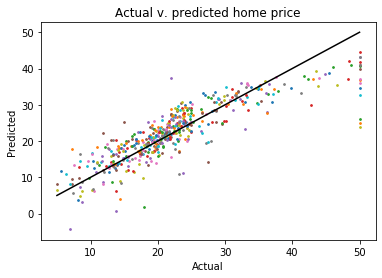

In [5]:
# linear regression, no standardization
x_train, y_train = prep_data(df)
model = fit_model(LinearRegression(), x_train, y_train)
visualize_results(model, x_train, y_train)

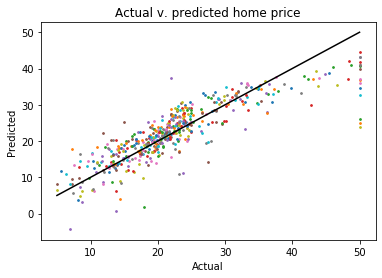

In [6]:
# linear regression, standardization
x_train, y_train = prep_data(df, scaler=StandardScaler())
model = fit_model(LinearRegression(), x_train, y_train)
visualize_results(model, x_train, y_train)

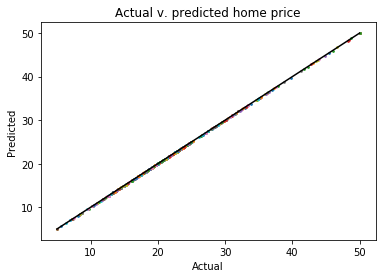

In [7]:
# decision tree, no standardization
x_train, y_train = prep_data(df)
model = fit_model(DecisionTreeRegressor(), x_train, y_train)
visualize_results(model, x_train, y_train)

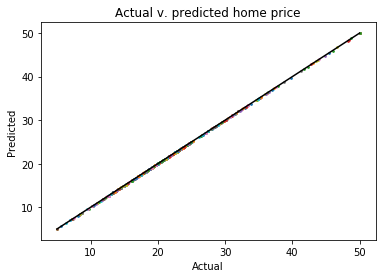

In [11]:
# decision tree, standardization
x_train, y_train = prep_data(df, scaler=StandardScaler())
model = fit_model(DecisionTreeRegressor(), x_train, y_train)
visualize_results(model, x_train, y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


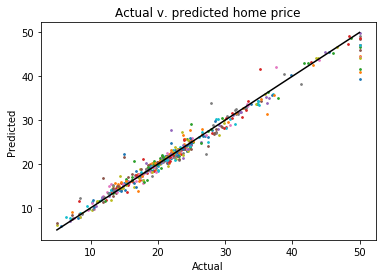

In [14]:
# random forests, no standardization
x_train, y_train = prep_data(df)
model = fit_model(RandomForestRegressor(), x_train, y_train)
visualize_results(model, x_train, y_train)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


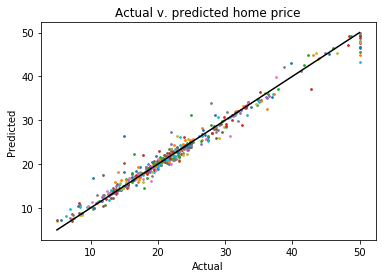

In [13]:
# random forests, standardization
x_train, y_train = prep_data(df, scaler=StandardScaler())
model = fit_model(RandomForestRegressor(), x_train, y_train)
visualize_results(model, x_train, y_train)